# Project 2: Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read csvs
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
# set option to display max columns always
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Problem statement

I imagine myself to be working for fund managing a portfolio of properties within Ames Iowa. So my goal is to build a regression model which predicts property prices in Ames Iowa accurately and explainable to non-data science folks.

The business intends to use the model in addition to existing real estate valuation models, to identify key timings to purchase and sell properties, redevelop and renovate properties to unlock and create value for their residential properties. This is all for the purpose of giving them an edge over their competitors, so that they can outperform the other funds in this industry.

I have interviewed an existing real estate agent active in Singapore. I found out that they have several valuation models which they commonly use. To name a few more commonly known ones, there is last transacted sales, which they will use as a comparison in the properties vicinity, adjusted for size of the property, age of the property and other condition. Secondly, there is the capitalisation method, where rental income will be divided by a discount rate. 

Looking at the data, we do not have access to rental, last transacted price in vicinity. This means that my model would essentially have no overlaps as the approach in valuation will be pretty different. 

## Understanding train.csv dataset

Noted that the train.csv and test.csv files have the same number of columns, except for SalePrice. As SalePrice is what we are trying to predict, for the purpose of EDA, I will be focusing on exploring the train dataset.

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


The dataset contains both qualitative and quantitative data. On further inspection, there is a good mix of ordinal, nominal, continuous and discrete data all within the dataset. Based on the source, the data has 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers). Many of the variables appear similar in nature, and I expect there to be significant overlaps.

In [5]:
train.shape

(2051, 81)

There is a huge number of data in the dataset, and more attention needs to be paid into making sure the integrity of the data is not compromised.

In [6]:
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

A large number of variables are in string object datatype, and will need to be converted to become numeric features, before they can be put into a Linear Regression model as features.

In [7]:
# Adding price per square foot for living space
train['PSF'] = train['SalePrice'] / train['Gr Liv Area']

Useful features like PSF are not readily present in the dataset. So they have been added to the dataset by transforming existing variables.

In [8]:
# Investigate all null values
train.isnull().sum()

# Create mask to find variables with null values
null_values = train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending=False)
null_values

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Cars          1
Garage Area          1
BsmtFin SF 1         1
dtype: int64

A large number of variables contains NaN. This will be handled in a separate notebook under Data Cleaning.

In [9]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.000000e+00,7.535000e+02,1.486000e+03,2.198000e+03,2.930000e+03
PID,2051.0,7.135900e+08,1.886918e+08,5.263011e+08,5.284581e+08,5.354532e+08,9.071801e+08,9.241520e+08
MS SubClass,2051.0,5.700878e+01,4.282422e+01,2.000000e+01,2.000000e+01,5.000000e+01,7.000000e+01,1.900000e+02
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,2.100000e+01,5.800000e+01,6.800000e+01,8.000000e+01,3.130000e+02
Lot Area,2051.0,1.006521e+04,6.742489e+03,1.300000e+03,7.500000e+03,9.430000e+03,1.151350e+04,1.590000e+05
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,1.000000e+01
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00,9.000000e+00
Year Built,2051.0,1.971709e+03,3.017789e+01,1.872000e+03,1.953500e+03,1.974000e+03,2.001000e+03,2.010000e+03
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1.950000e+03,1.964500e+03,1.993000e+03,2.004000e+03,2.010000e+03
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.610000e+02,1.600000e+03


Similarly, many zero values are observed in the data. This will be explored in the Data Cleaning section where zero values are used in conjunction with NaN null values for deductive imputation purpose.

In [10]:
# Filter out numeric and categorical features column names
num_features = [col for col in train._get_numeric_data().columns]
cat_features = [col for col in train.select_dtypes(include=['object']).columns]

Numerical features and categorical features are sorted out into lists, for easy EDA later.

## Numerical features

In [11]:
# Create scatterplot function 
# Custom function for plotting of numeric features
def scatterplot_(df, columnnames, yaxis):    
    nrows = int(np.ceil(len(columnnames)/5))
    ncols = 5
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*2.5))
    ax = ax.ravel()
    
    for i, column in enumerate(columnnames):
        g = sns.regplot(data=df, x=column, y=yaxis, ax=ax[i], ci=None, color='skyblue', line_kws={'color': 'red'})
        ax[i].set_title(column, fontsize=14)
        ax[i].set_xlabel('')
        plt.tight_layout()
    
    # Hide unused plots
    for i in range(nrows * ncols - len(columnnames)):
        ax[-i-1].set_visible(False) # Start from -1
    
    plt.suptitle('Scatterplot numeric features against sales price', fontsize=20, y=1.015)

I have written a scatterplot function above to aid my plotting of subplots, and aid my EDA process.

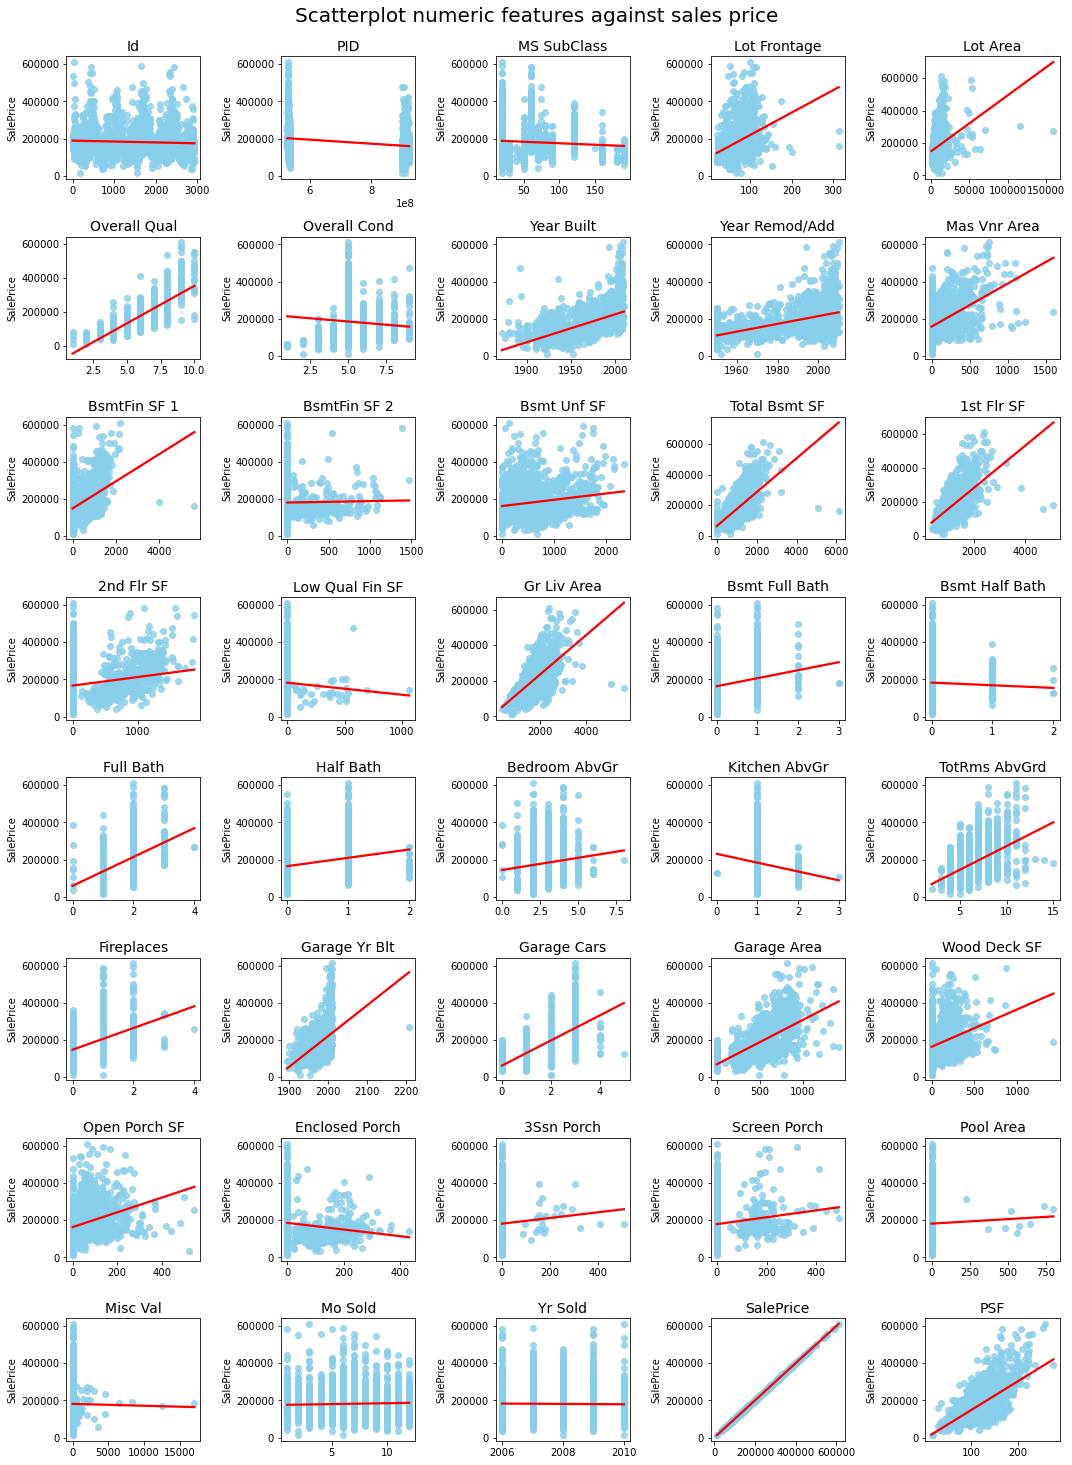

In [12]:
scatterplot_(train, num_features, 'SalePrice')

### Observations from scatterplot
It was interesting to note that Yr Sold did not appear to have any relationship with sales price. Especially noting that the 2018 subprime mortgage crisis is widely known to have impacted the housing market. 

As expected, some features which are size related, such as Lot Area, Mas Vnr Area, Gr Liv Area and  seem to have positive correlation to sales price.

Some features do not seem to have a relationship with sales price, and in the first iteration of my model, I either further manipulate the feature, or I will look to drop it. Caution will be put in, to prevent dropping important features which have a relationship with Sale Price.

They are: 
1) ID

2) PID

3) MS SubClass - will not be dropping, as this will be made categorical later on.

4) Mo Sold - will not be dropping, as this will be made categorical later on.

5) Yr Sold - more time will be looked into this as I have expected the financial crisis to affect this.

## Categorical features

In [13]:
# Custom function for plotting of categorical features
def plot_box(df, columnnames, yaxis):    
    nrows = int(np.ceil(len(columnnames)/5))
    ncols = 5
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 45))
    ax = ax.ravel()
    
    for i, column in enumerate(columnnames):
        g = sns.boxplot(data=df, y=column, x=yaxis, ax=ax[i], orient='h')
        ax[i].set_title(column, fontsize=16)
        g.set(xlabel=None)
        g.set(ylabel=None)
        g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000])
        g.set(xticklabels=['0','100','200','300','400','500','600'])
        plt.tight_layout()
    
    # Hide unused plots
    for i in range(nrows * ncols - len(columnnames)):
        ax[-i-1].set_visible(False) # Start from -1
    
    plt.suptitle('Boxplots of categoric features against sale price', fontsize=30, y=1.015)

In [14]:
#For the purpose of plotting and prelinary EDA, change all NaN in categorical to None
catdf=train.replace({np.nan: 'None'})

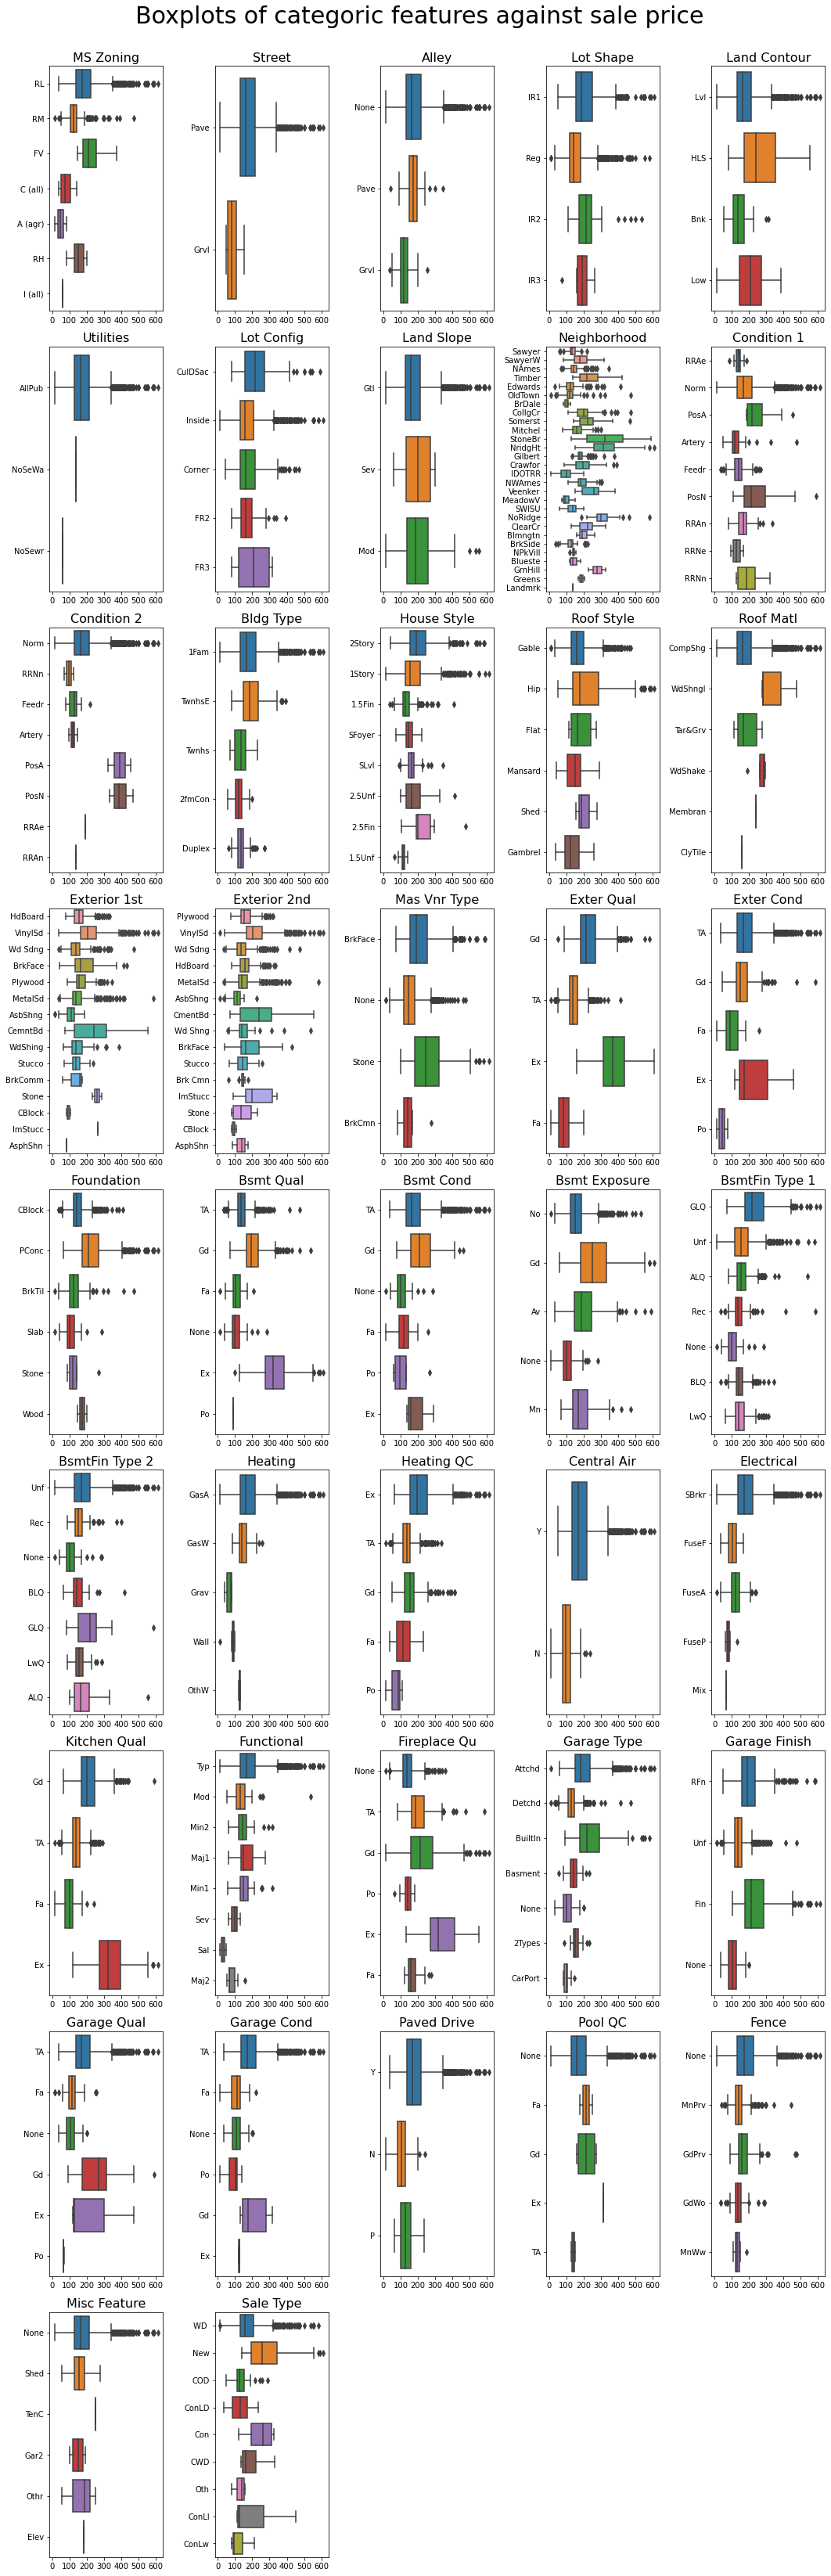

In [15]:
# Create boxplot
plot_box(catdf, cat_features, 'SalePrice')

### Primary Observations

There are generally effects which categorical variables bring to SalePrice. However, each of them have different effects, and I have tried to reflect this through the use of imputing different weights when I convert them into numerical values. However, it seems that the best way is to get dummies the relevant features, so that the weights can be optimized.

There is a trade off in doing so, as more features will be created, that can lead to overfitting. However, if the feature is indeed relevant, by doing get dummies, it would increase the accuracy of the prediction. Quality related features looks worthwhile to get dummies, along with neighborhood. To balance out creating too many columns from get dummies, for the less important features, I will manually impute a weight into it.

For example, houses with irregular lot shapes actually seem to have higher median prices. Accordingly, we should give more weight to irregular shapes over regular shapes. Land Slope seems to follow a similar pattern, where severe and moderate slope have higher median price than gentle slope. Accordingly, we can give equal weight to moderate and severe slope over gentle slopes. Similar methodology will be used when changing categorical features to numerical.

I noticed that there is a trend when it comes to relationship with sales price. For example having good qualitative variables in Paved Drive, Garage Finish, Pool QC, Kitchen Qual, Central Air, Heating QC, Exter Qual, Fireplace Qu, so it might be valuable to dig into this variables, by using get dummies.

Neighborhood is a feature that requires further analysis, as some neighborhoods have greater spreads than others, afterall, in property, there is the popular phrase “location, location, location” as the three things that matter in property. There is a need to look at feature selection methods that can allow a large number of features to be filtered through, especially for this neighborhood feature.


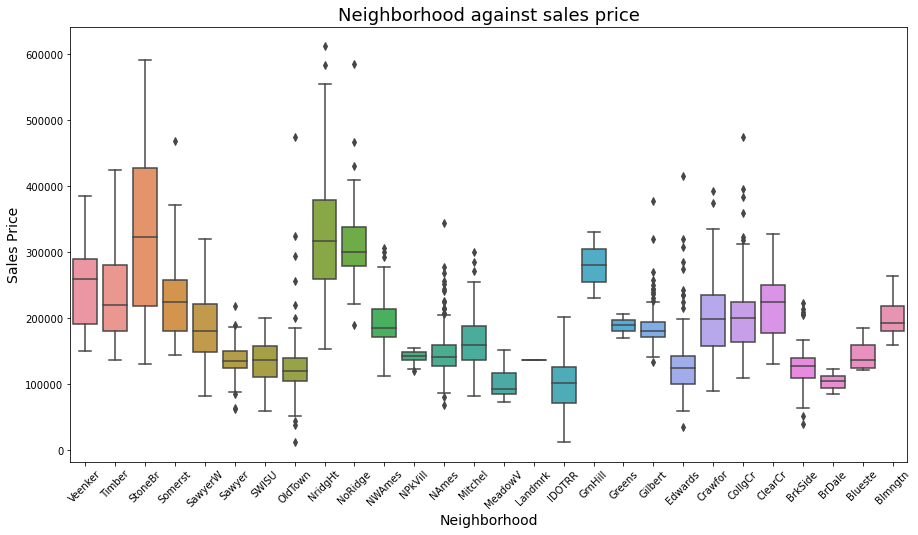

In [16]:
# Plotting neighborhood against sales price
plt.figure(figsize=(15, 8))
sns.boxplot(data=train, x=train['Neighborhood'].sort_values(ascending=False), y='SalePrice')
plt.xticks(rotation=45);
plt.title('Neighborhood against sales price', fontsize=18)
plt.ylabel('Sales Price', fontsize=14)
plt.xlabel('Neighborhood', fontsize=14);

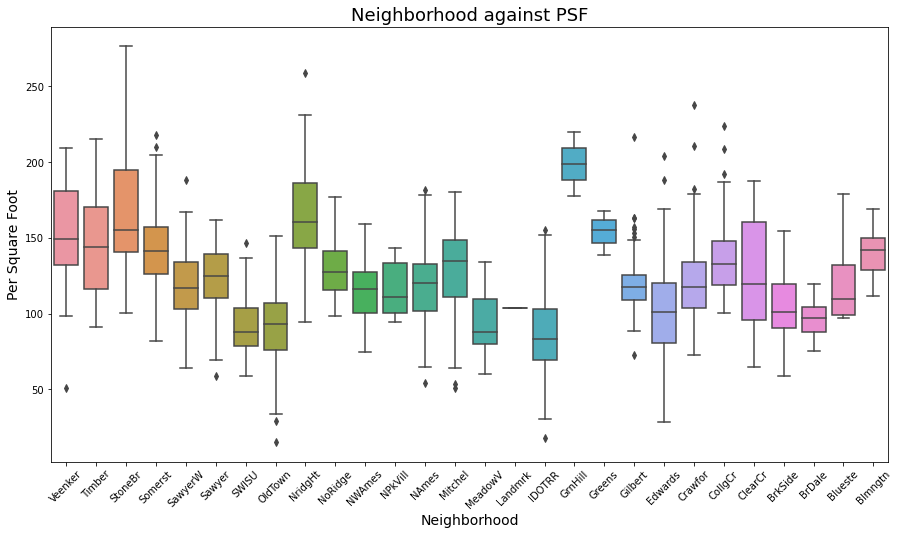

In [17]:
# Plotting neighborhood against PSF
plt.figure(figsize=(15, 8))
sns.boxplot(data=train, x=train['Neighborhood'].sort_values(ascending=False), y='PSF')
plt.xticks(rotation=45);
plt.title('Neighborhood against PSF', fontsize=18)
plt.ylabel('Per Square Foot', fontsize=14)
plt.xlabel('Neighborhood', fontsize=14);

There are clearly some neighborhoods that have higher median prices sales price than others, as well as higher per square foot than others. 

StoneBr and Nridght in particular have the highest median sales price, the largest spread in tails, and the biggest interquartile ranges. On further investigation, it could be due to Nridght being one of the newest towns. GrnHill and Greens has the highest per square feet.

On the otherhand, there are neighborhoods with lower median price, such as OldTown, BrDale and Sawyer. On deeper investigation, it could be due to those towns being the oldest towns around, therefore leading to not as much demand for the property in that area.

There is clearly a need to categorize this feature, as there are simply too many neighborhoods to make any meaningful prediction. With use of machine learning via use of Lasso and RFE, I hope to outsource the sorting and prioritization to the computer, as it would be time consuming and error prone for me to do it.

I have personally tried splitting neigborhood into 5 categories based on PSF. However, the data gave a worst RMSE score. As such, use of machine learning is superior here.

In [18]:
train.SalePrice.groupby(train['Yr Sold']).describe()

,count,mean,std,min,25%,50%,75%,max
Yr Sold,,,,,,,,
2006,438.0,179471.609589,81906.247408,35000.0,129575.0,159250.0,213342.5,584500.0
2007,498.0,185524.514056,77140.408272,39300.0,130000.0,167150.0,215750.0,591587.0
2008,435.0,181750.372414,77388.336168,13100.0,129500.0,163000.0,219413.0,475000.0
2009,446.0,182455.244395,81882.460077,34900.0,129925.0,163000.0,213000.0,582933.0
2010,234.0,174180.059829,77047.778280,12789.0,128000.0,155000.0,206000.0,611657.0


In [19]:
train.PSF.groupby(train['Yr Sold']).describe()

,count,mean,std,min,25%,50%,75%,max
Yr Sold,,,,,,,,
2006,438.0,120.590179,30.662493,45.454545,98.731897,120.889338,138.363016,223.988439
2007,498.0,123.426875,31.187427,33.692722,104.169821,122.555636,139.888592,276.250881
2008,435.0,121.674536,33.499469,17.871760,99.707804,119.520320,140.743811,237.590799
2009,446.0,121.190105,33.917685,29.370301,98.265547,119.544862,141.733563,231.057452
2010,234.0,120.996820,32.421802,15.371394,100.819036,120.471980,142.628885,258.738156


The min sales price in 2008 and 2010 was lower than 2006, 2007 and 2009, max sales price in 2008 was also lower than all other years.

It gives good reason to look at year as a categorical variable through get dummies instead of a numerical variable, as some years have a deflated property market, and I would want my model to be able to factor that in. This will be implemented in Data cleaning.

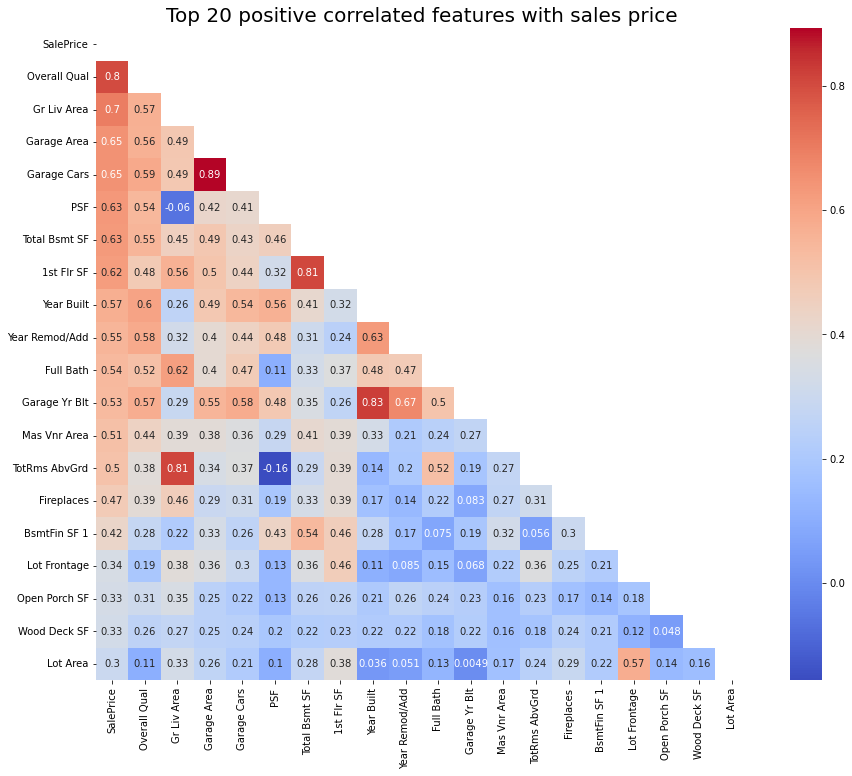

In [20]:
# Create mask for our top twenty positively correlated features
top_corr = train.corr()['SalePrice'].sort_values(ascending=False).head(20).index

#Plot heatmap of top twenty positively correlated features.
plt.figure(figsize=(15,12))
mask = np.triu(np.ones_like(train[top_corr].corr(), dtype=bool))
ax = sns.heatmap(train[top_corr].corr(), cmap='coolwarm', mask=mask, square=True, annot=True)
plt.title('Top 20 positive correlated features with sales price', fontsize=20);

There are several features that are highly correlated to each other. To prevent multicollinearity, I would consider dropping them during feature engineering. The dropping of features will be done in Feature Engineering notebook. 

The following are the features that have high correlation to each other:

1) Garage Cars vs Garage Area

2) Total Bsmt SF vs 1st Floor SF

3) Year Blt vs Garage Yr Blt